In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_all = pd.read_csv('evaluation_results_all.csv')

In [84]:
def violin_plot_without_outliers(df, title, key, key_label):
	Q1 = df[key].quantile(0.25)
	Q3 = df[key].quantile(0.75)

	IQR = Q3 - Q1
	df = df[(df[key] >= (Q1 - 1.5 * IQR)) & (df[key] <= (Q3 + 1.5 * IQR))]

	# Create the violin plot again without outliers
	plt.figure(figsize=(12, 6))
	model_map = {
		'codellama': 'CodeLlama-7b',
		'mistral': 'Mistral-7b',
		'mistral-shorten': 'Mistral-7b-Shorten',
		'phi3.5': 'Phi-3.5'
	}
	df.loc[:, 'model'] = df['model'].map(model_map)
	plt.rcParams.update({'font.size': 15})
	sns.violinplot(x='model', y=key, hue='prompt', data=df, split=False)
	plt.xlabel('Model')
	plt.ylabel(key_label)
	plt.legend(title='Technique')
	plt.show()

In [58]:
filtered_df = df_all[df_all['temperature'] == 0.7]

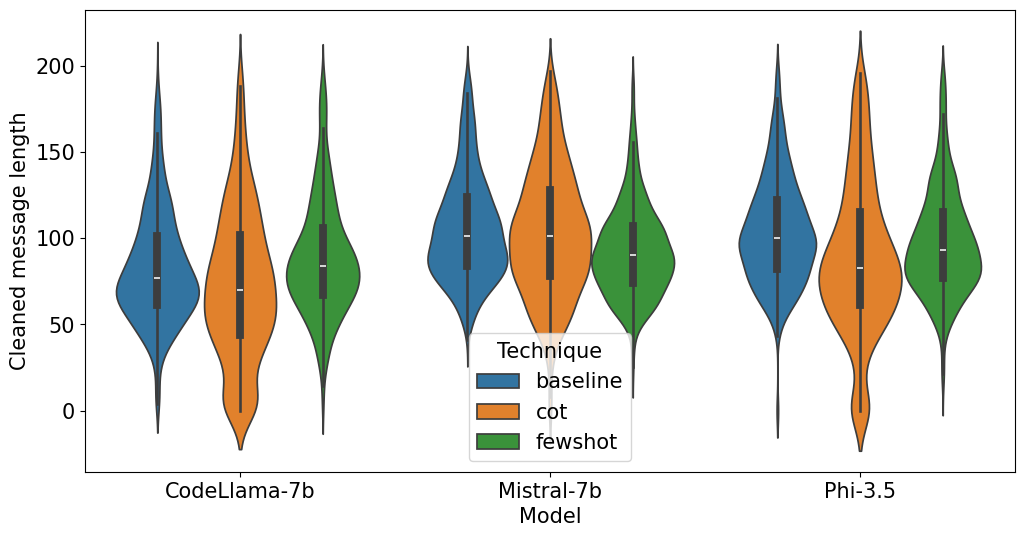

In [86]:
violin_plot_without_outliers(filtered_df, r'Violin plot of generated (cleaned) length for each $model \times prompt$'+"\n"+' (temperature 0.7) without outliers.', 'cleaned_length', 'Cleaned message length')


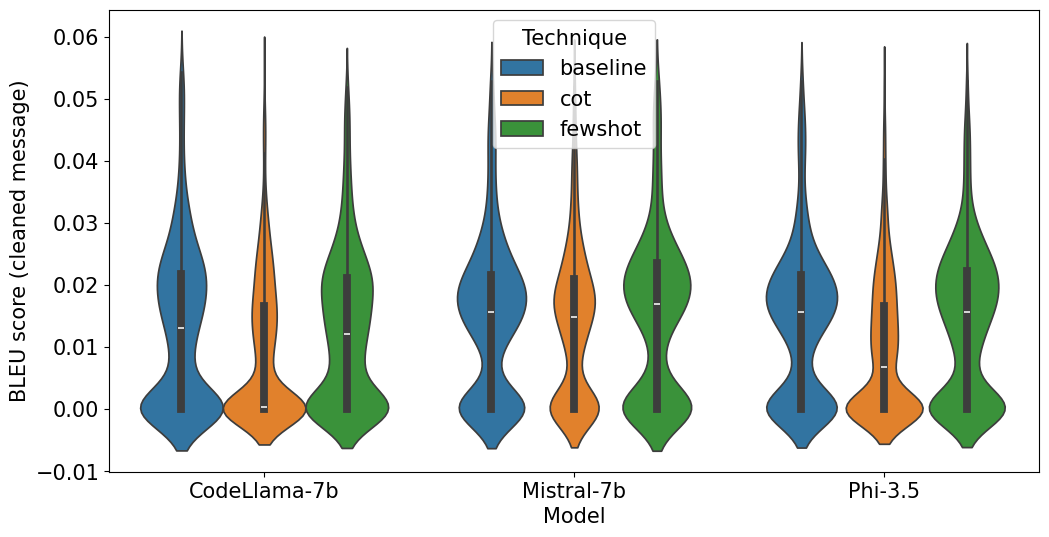

In [87]:
violin_plot_without_outliers(filtered_df, r'Violin plot of BLEU score of the cleaned message for each '+"\n"+r'$model \times prompt$ without outliers', 'cleaned_bleu', 'BLEU score (cleaned message)')

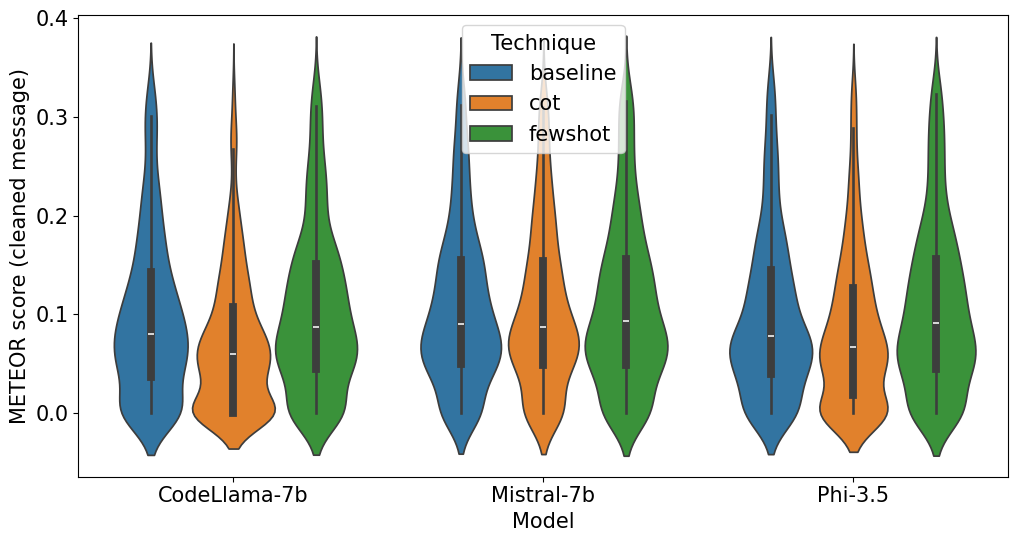

In [88]:
violin_plot_without_outliers(filtered_df, r'Violin plot of METEOR score of the cleaned message for each '+"\n"+r'$model \times prompt$ without outliers', 'cleaned_meteor', 'METEOR score (cleaned message)')

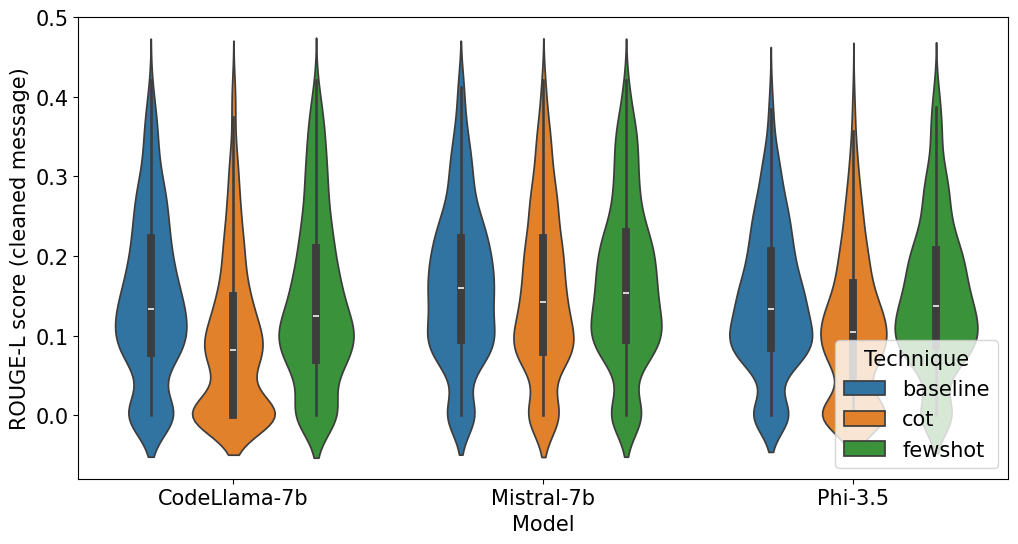

In [89]:
violin_plot_without_outliers(filtered_df, r'Violin plot of ROUGE-L score of the cleaned message for each '+"\n"+r'$model \times prompt$ without outliers', 'cleaned_rouge_l', 'ROUGE-L score (cleaned message)')